# **Feature Engineering and Data Preprocessing on Car Price Prediction Dataset**
### Name: Swapnil Santosh Akhade
### Dept: AIML (A1)
### Date: 2 Nov 2025

This notebook performs data preprocessing and feature engineering steps on a car price prediction dataset obtained from Kaggle. The steps include handling missing data, encoding categorical variables, feature scaling, feature selection using SelectKBest, and dimensionality reduction using PCA.

Installing and Importing Libraries

In [1]:
!pip install kagglehub

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt
import seaborn as sns

Download Dataset from Kaggle

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zafarali27/car-price-prediction")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/zafarali27/car-price-prediction/versions/1


Load the .csv

In [3]:
import os

file_path = os.path.join(path, "car_price_prediction_.csv")
df = pd.read_csv(file_path)
df.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


Exploring the Data

In [4]:
df.info()
df.describe()
df.isnull().sum()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2500 non-null   int64  
 1   Brand         2500 non-null   object 
 2   Year          2500 non-null   int64  
 3   Engine Size   2500 non-null   float64
 4   Fuel Type     2500 non-null   object 
 5   Transmission  2500 non-null   object 
 6   Mileage       2500 non-null   int64  
 7   Condition     2500 non-null   object 
 8   Price         2500 non-null   float64
 9   Model         2500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB


,0
Car ID,2500
Brand,7
Year,24
Engine Size,51
Fuel Type,4
Transmission,2
Mileage,2490
Condition,3
Price,2499
Model,28


Check for NULL values

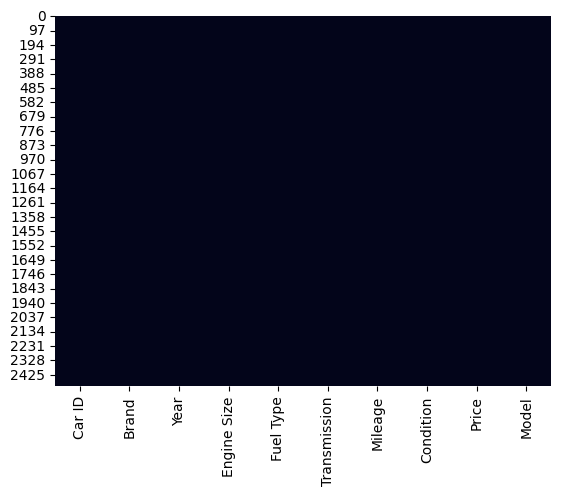

In [5]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

Handling Missing Values

In [6]:
# Numerical columns → fill with mean
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

# Categorical columns → fill with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

Check with columns

In [7]:
cat_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:\n", cat_cols.tolist())

Categorical Columns:
 ['Brand', 'Fuel Type', 'Transmission', 'Condition', 'Model']


Check Unique Values

In [8]:
for col in ['Brand', 'Fuel Type', 'Transmission', 'Condition', 'Model']:
    print(f"{col}: {df[col].nunique()} unique values")

Brand: 7 unique values
Fuel Type: 4 unique values
Transmission: 2 unique values
Condition: 3 unique values
Model: 28 unique values


Encode “Transmission” (binary column)

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Transmission'] = le.fit_transform(df['Transmission'])

print("Unique values after encoding:")
print(df['Transmission'].unique())

Unique values after encoding:
[1 0]


Encode “Condition” (3 unique values)

In [10]:
df = pd.get_dummies(df, columns=['Condition'], drop_first=True)

In [11]:
df.columns

Index(['Car ID', 'Brand', 'Year', 'Engine Size', 'Fuel Type', 'Transmission',
       'Mileage', 'Price', 'Model', 'Condition_New', 'Condition_Used'],
      dtype='object')

Encode “Fuel Type” (4 unique values)

In [12]:
df = pd.get_dummies(df, columns=['Fuel Type'], drop_first=True)

In [13]:
df.columns

Index(['Car ID', 'Brand', 'Year', 'Engine Size', 'Transmission', 'Mileage',
       'Price', 'Model', 'Condition_New', 'Condition_Used',
       'Fuel Type_Electric', 'Fuel Type_Hybrid', 'Fuel Type_Petrol'],
      dtype='object')

Encode “Brand” (7 unique values)

In [14]:
df = pd.get_dummies(df, columns=['Brand'], drop_first=True)

In [15]:
df.columns

Index(['Car ID', 'Year', 'Engine Size', 'Transmission', 'Mileage', 'Price',
       'Model', 'Condition_New', 'Condition_Used', 'Fuel Type_Electric',
       'Fuel Type_Hybrid', 'Fuel Type_Petrol', 'Brand_BMW', 'Brand_Ford',
       'Brand_Honda', 'Brand_Mercedes', 'Brand_Tesla', 'Brand_Toyota'],
      dtype='object')

Encode “Model” (28 unique values)

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Model'] = le.fit_transform(df['Model'])

df.head()

,Car ID,Year,Engine Size,Transmission,Mileage,Price,Model,Condition_New,Condition_Used,Fuel Type_Electric,Fuel Type_Hybrid,Fuel Type_Petrol,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Mercedes,Brand_Tesla,Brand_Toyota
0,1,2016,2.3,1,114832,26613.92,19,True,False,False,False,True,False,False,False,False,True,False
1,2,2018,4.4,1,143190,14679.61,1,False,True,True,False,False,True,False,False,False,False,False
2,3,2013,4.5,1,181601,44402.61,3,True,False,True,False,False,False,False,False,False,False,False
3,4,2011,4.1,0,68682,86374.33,20,True,False,False,False,False,False,False,False,False,True,False
4,5,2009,2.6,1,223009,73577.10,21,False,False,False,False,False,False,True,False,False,False,False


### Feature Scaling (Standardization)
Separate Features (X) and Target (y)

In [17]:
X = df.drop(columns=['Price', 'Car ID'])  # Features
y = df['Price']                           # Target

Scale the Feature Columns

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Convert Back to a DataFrame (Optional, for readability)

In [19]:
import pandas as pd

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Year,Engine Size,Transmission,Mileage,Model,Condition_New,Condition_Used,Fuel Type_Electric,Fuel Type_Hybrid,Fuel Type_Petrol,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Mercedes,Brand_Tesla,Brand_Toyota
0,0.625610,-0.813848,0.954628,-0.397234,0.708782,1.445764,-0.720942,-0.570576,-0.562568,1.722862,-0.408820,-0.401460,-0.404813,-0.405482,2.486746,-0.419425
1,0.911720,0.652872,0.954628,-0.074626,-1.512177,-0.691676,1.387075,1.752616,-0.562568,-0.580429,2.446066,-0.401460,-0.404813,-0.405482,-0.402132,-0.419425
2,0.196444,0.722716,0.954628,0.362347,-1.265404,1.445764,-0.720942,1.752616,-0.562568,-0.580429,-0.408820,-0.401460,-0.404813,-0.405482,-0.402132,-0.419425
3,-0.089667,0.443340,-1.047528,-0.922249,0.832169,1.445764,-0.720942,-0.570576,-0.562568,-0.580429,-0.408820,-0.401460,-0.404813,-0.405482,2.486746,-0.419425
4,-0.375778,-0.604316,0.954628,0.833415,0.955555,-0.691676,-0.720942,-0.570576,-0.562568,-0.580429,-0.408820,2.490906,-0.404813,-0.405482,-0.402132,-0.419425


### Feature Selection using SelectKBest
Import and Apply SelectKBest

In [20]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select top 10 features most correlated with Price
selector = SelectKBest(score_func=f_regression, k=10)
X_new = selector.fit_transform(X_scaled, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Top 10 Selected Features:")
print(selected_features)

Top 10 Selected Features:
Index(['Year', 'Model', 'Condition_New', 'Fuel Type_Electric',
       'Fuel Type_Petrol', 'Brand_BMW', 'Brand_Ford', 'Brand_Honda',
       'Brand_Tesla', 'Brand_Toyota'],
      dtype='object')


View the Reduced Dataset

In [21]:
X_selected = pd.DataFrame(X_new, columns=selected_features)
X_selected.head()

,Year,Model,Condition_New,Fuel Type_Electric,Fuel Type_Petrol,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Tesla,Brand_Toyota
0,0.625610,0.708782,1.445764,-0.570576,1.722862,-0.408820,-0.401460,-0.404813,2.486746,-0.419425
1,0.911720,-1.512177,-0.691676,1.752616,-0.580429,2.446066,-0.401460,-0.404813,-0.402132,-0.419425
2,0.196444,-1.265404,1.445764,1.752616,-0.580429,-0.408820,-0.401460,-0.404813,-0.402132,-0.419425
3,-0.089667,0.832169,1.445764,-0.570576,-0.580429,-0.408820,-0.401460,-0.404813,2.486746,-0.419425
4,-0.375778,0.955555,-0.691676,-0.570576,-0.580429,-0.408820,2.490906,-0.404813,-0.402132,-0.419425


### PCA Implementation
Import PCA and Apply It

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.09633359 0.09424867]


Visualize PCA Components

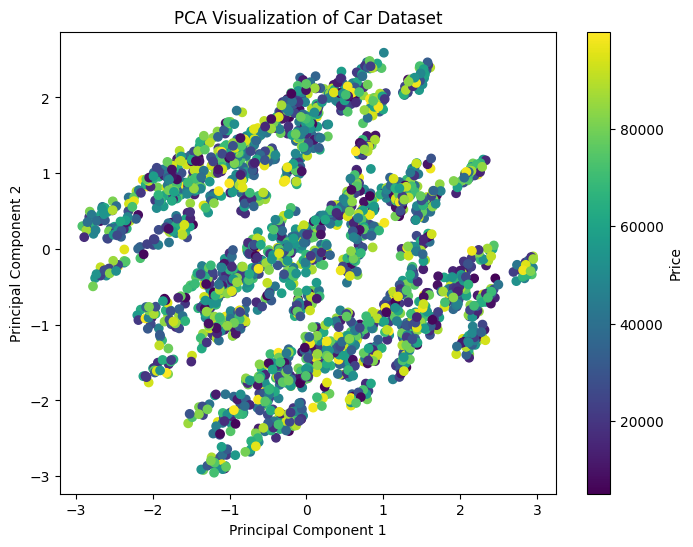

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Car Dataset')
plt.colorbar(label='Price')
plt.show()

Check How Many Components Explain Most Variance

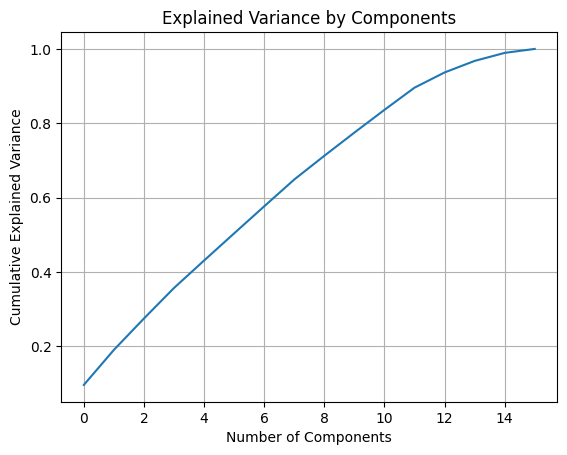

In [24]:
pca_full = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()